In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.__version__
%matplotlib inline

In [2]:
df = pd.read_csv("Final_iris_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train Test Spliting 

In [6]:
X = df.drop(['Species'], axis=1)
y = df['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
print("----------X coloumn-------- ")
print(X.head())
print("----------Y coloumn-------- ")
print(y.head())

----------X coloumn-------- 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
----------Y coloumn-------- 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46)


In [10]:
print("X train set shpae - ",X_train.shape)
print("y train set shpae - ",y_train.shape)
print("X test set shpae - ",X_test.shape)
print("y test set shpae - ",y_test.shape)

X train set shpae -  (112, 4)
y train set shpae -  (112,)
X test set shpae -  (38, 4)
y test set shpae -  (38,)


In [11]:
svm = SVC()
svm

SVC()

In [12]:
svm.fit(X_train,y_train)

SVC()

In [13]:
svm.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [14]:
pred=svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)*100

89.47368421052632

In [15]:
pd.Series(pred).value_counts() # getting the count of each category 

Iris-setosa        15
Iris-versicolor    12
Iris-virginica     11
dtype: int64

In [16]:
y_test.value_counts()

Iris-setosa        15
Iris-virginica     13
Iris-versicolor    10
Name: Species, dtype: int64

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
svm.predict([[5.1, 4, 4, 3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [19]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.75      0.90      0.82        10
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.89      0.89      0.88        38
   weighted avg       0.90      0.89      0.90        38



In [20]:
print(confusion_matrix(y_test,pred))

[[15  0  0]
 [ 0  9  1]
 [ 0  3 10]]


In [21]:
dt = confusion_matrix(y_test, pred)

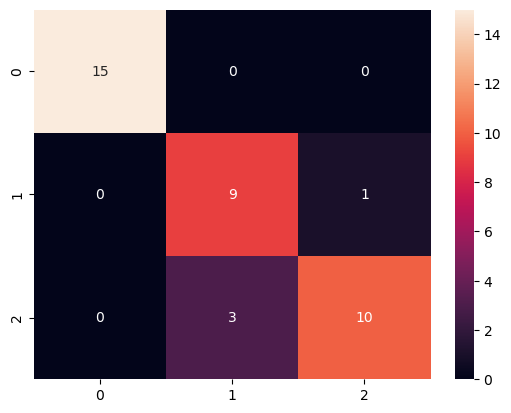

In [22]:
sns.heatmap(dt,annot=True)
plt.savefig('Confusion_SVM.png')

## Cross Validation with Grid Search CV

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [23]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 10]}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Create an instance of the SVC class
svc = SVC()

In [26]:
# Create a GridSearchCV object with the SVC estimator and the hyperparameters to be tuned
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

In [38]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [28]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [29]:
grid_search.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='poly')

In [30]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best score:  0.9913043478260869


In [31]:
grid_predictions = grid_search.predict(X_test)

In [32]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.92        38
      macro avg       0.92      0.91      0.91        38
   weighted avg       0.92      0.92      0.92        38



In [33]:
grid_predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [34]:
grid_SVM = confusion_matrix(y_test,grid_predictions)
grid_SVM

array([[15,  0,  0],
       [ 0,  8,  2],
       [ 0,  1, 12]], dtype=int64)

In [35]:
#training & Testing Accuracy
print("training Accuracy","\n")
grid_search.score(X_train,y_train)


training Accuracy 



0.9910714285714286

In [36]:
print("testing Accuracy","\n")
grid_search.score(X_test,y_test)

testing Accuracy 



0.9210526315789473

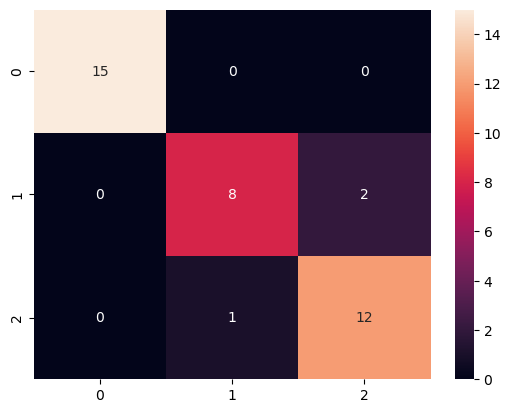

In [37]:
sns.heatmap(grid_SVM,annot=True)
plt.savefig('GridSearchSVM.png')

## Much Improved after GridSearch CV